In [4]:
from Utils.data_generators import *
from Utils.util_functions import *
package = 'prim'

experiment 24/24

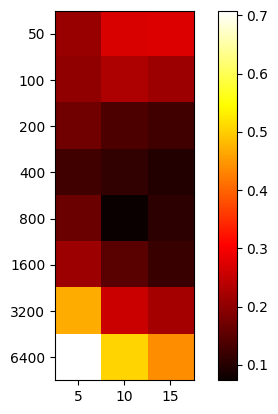

In [9]:
create_plot_generated_data(calculate_y_oakley_ohagan2004, 15, package)

experiment 24/24

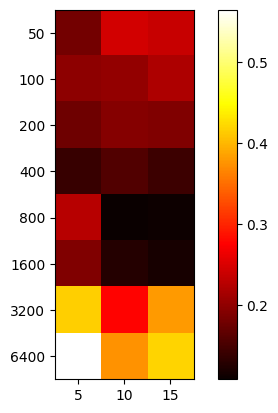

In [10]:
create_plot_generated_data(calculate_y_ackley, 15, package)

experiment 24/24

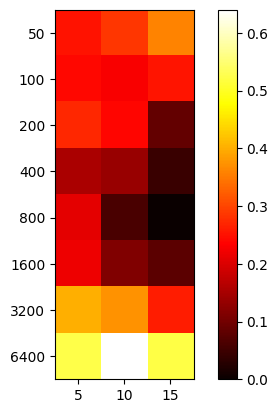

In [11]:
create_plot_generated_data(calculate_y_griewank, 15, package)

experiment 32/32

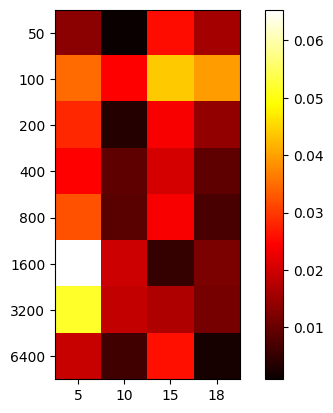

In [12]:
pts = [50, 100, 200, 400, 800, 1600, 3200, 6400]  # number of points to experiment with
atrs = [5, 10, 15, 18]  # number of dimensions to experiment with
res_train = np.empty((len(pts), len(atrs)))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty((len(pts), len(atrs)))  # matrix with the results
res_test[:] = np.nan
k = 1
data = get_data('susy')

for n in range(len(pts)):
    for m in range(len(atrs)):
        prec_train = []
        prec_test = []
        for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
            sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)*len(atrs)))
            
            num_columns_to_select = atrs[m]  # Change this to the number of columns you need
            label_column = None
            
            data_temp = data.copy()
            label_column = data_temp['label']
            data_temp.drop('label', axis=1, inplace=True)

                # Select random columns
            selected_columns = random.sample(list(data_temp.columns), num_columns_to_select)

                # Create a new DataFrame with the selected columns
            data_temp = data_temp[selected_columns]
            data_temp.insert(loc=0, column='label', value=label_column)
            
                #sampeling a subset of the whole data set
            sample_train, sample_test = train_test_split(data_temp, test_size=pts[n], train_size=pts[n]*2, stratify=data_temp['label'])
        
            sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
            sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

            y = sample_train['label'].values
            sample_train.drop('label', axis=1, inplace=True)
            x = sample_train.values
            
            y_test = sample_test['label']
            sample_test.drop('label', axis=1, inplace=True)
            x_test = sample_test.values
            
            prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
            prim_alg.fit()
            precisions = prim_alg.get_precisions()
            if len(precisions) <= 0:
                prec_train.append(0)
            else:
                prec_train.append(precisions[len(precisions)-1])
            boxes = prim_alg.get_boxes()
            if len(boxes) <= 0:
                prec_test.append(0)
            else:
                box = boxes[len(boxes) - 1]
                box = pd.DataFrame(box)
                prec_test.append(calculate_precision_test_data_onebox(box, x_test, y_test))           
        
        res_train[n, m] = np.mean(prec_train)
        res_test[n, m] = np.mean(prec_test) 
        k = k + 1

plt.imshow(res_train-res_test, cmap='hot')
plt.yticks(np.arange(len(pts)), pts)
plt.xticks(np.arange(len(atrs)), atrs)
plt.colorbar()
plt.show()

experiment 32/32

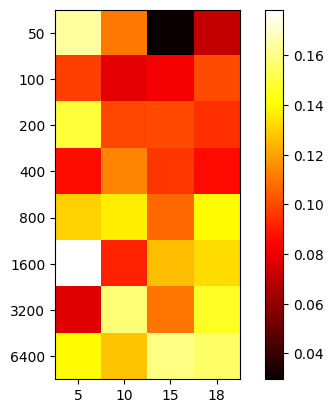

In [17]:
pts = [50, 100, 200, 400, 800, 1600, 3200, 6400]  # number of points to experiment with
atrs = [5, 10, 15, 18]  # number of dimensions to experiment with
res_train = np.empty((len(pts), len(atrs)))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty((len(pts), len(atrs)))  # matrix with the results
res_test[:] = np.nan
k = 1
data = get_data('higgs')

for n in range(len(pts)):
    for m in range(len(atrs)):
        prec_train = []
        prec_test = []
        for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
            sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts) * len(atrs)))

            num_columns_to_select = atrs[m]  # Change this to the number of columns you need
            label_column = None

            data_temp = data.copy()
            label_column = data_temp['label']
            data_temp.drop('label', axis=1, inplace=True)

            # Select random columns
            selected_columns = random.sample(list(data_temp.columns), num_columns_to_select)

            # Create a new DataFrame with the selected columns
            data_temp = data_temp[selected_columns]
            data_temp.insert(loc=0, column='label', value=label_column)

            #sampeling a subset of the whole data set
            sample_train, sample_test = train_test_split(data_temp, test_size=pts[n], train_size=pts[n] * 2, stratify=data_temp['label'])

            sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
            sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

            y = sample_train['label'].values
            sample_train.drop('label', axis=1, inplace=True)
            x = sample_train.values

            y_test = sample_test['label']
            sample_test.drop('label', axis=1, inplace=True)
            x_test = sample_test.values

            prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
            prim_alg.fit()
            precisions = prim_alg.get_precisions()
            if len(precisions) <= 0:
                prec_train.append(0)
            else:
                prec_train.append(precisions[len(precisions) - 1])
            boxes = prim_alg.get_boxes()
            if len(boxes) <= 0:
                prec_test.append(0)
            else:
                box = boxes[len(boxes) - 1]
                box = pd.DataFrame(box)
                prec_test.append(calculate_precision_test_data_onebox(box, x_test, y_test))

        res_train[n, m] = np.mean(prec_train)
        res_test[n, m] = np.mean(prec_test)
        k = k + 1

plt.imshow(res_train - res_test, cmap='hot')
plt.yticks(np.arange(len(pts)), pts)
plt.xticks(np.arange(len(atrs)), atrs)
plt.colorbar()
plt.show()